# ВКР

Импорт библиотек

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import validation

In [4]:
import pickle

## Работа с исходными данными

#### Загружаем датасеты и преобразуем в Pandas/DataFrame.
Используем первую колонку исходного датасета как индекс. Проверим, что загрузилось

In [5]:
df_xpb = pd.read_excel('X_bp.xlsx', index_col=0)
df_xpb.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
df_xnup = pd.read_excel('X_nup.xlsx', index_col=0)
df_xnup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


*Исходные датасеты содержат разное количество строк. После объединения датасетов по типу INNER часть строк второго датасета будет потеряна (17 строк).*

#### Посмотрим, какое количество уникальных значений содежрит каждый параметр

In [7]:
df_xpb.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [13]:
df_xnup.nunique()

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

*Параметр "Угол нашивки, град" содержит всего 2 уникальных значения. Его можно закодировать его с помощью LabelEncoder*

#### Объединяем датафреймы по индексу тип объединения INNER

In [9]:
df_pr = df_xpb.merge(df_xnup, left_index = True, right_index = True, how = 'inner')
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Выводим первые 10 строк

In [10]:
df_pr.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   
5.0                         2.767918            2000.0             748.000000   
6.0                         2.569620            1910.0             807.000000   
7.0                         2.561475            1900.0             535.000000   
8.0                         3.557018            1930.0             889.000000   
9.0                         3.532338            2100.0            1421.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   
5.0                       111.86                        22.267857   
6.0                       111.86                        22.267857   
7.0                       111.86                        22.267857   
8.0                       129.00                        21.250000   
9.0                       129.00                        21.250000   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   
5.0                284.615385                          210.0   
6.0                284.615385                          210.0   
7.0                284.615385                          380.0   
8.0                300.000000                          380.0   
9.0                300.000000                         1010.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   
5.0                                  70.0                         3000.0   
6.0                                  70.0                         3000.0   
7.0                                  75.0                         1800.0   
8.0                                  75.0                         1800.0   
9.0                                  78.0                         2000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   
5.0                    220.0                 0.0          5.0   
6.0                    220.0                 0.0          5.0   
7.0                    120.0                 0.0          7.0   
8.0                    120.0                 0.0          7.0   
9.0                    300.0                 0.0          7.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70

Посмотрим описательную статистику полученного датасета

In [12]:
df_pr.describe().round(2).T

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки, град                    1023.0    44.25   45.02     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

## Разведочный анализ данных

#### Проверяем наличие пропусков данных

In [14]:
df_pr.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

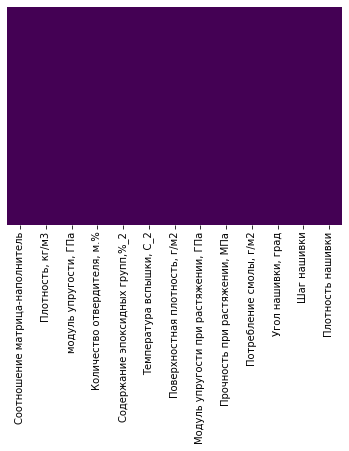

In [15]:
sns.heatmap(df_pr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Пропусков данных нет*

#### Проверим наличие дубликатов данных

In [16]:
df_pr.duplicated().sum()

0

*Дубликатов данных нет*

#### Построим гистаграммы распределения каждого параметра

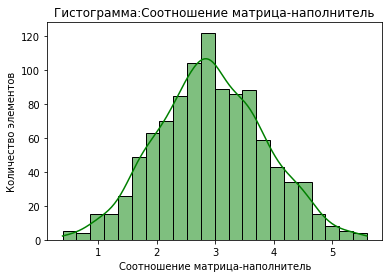

Минимальное значение: 0.389402605178414
Максимальное значение: 5.59174159869754
Среднее значение: 2.9303657734325506
Медианное значение: 2.90687765033521


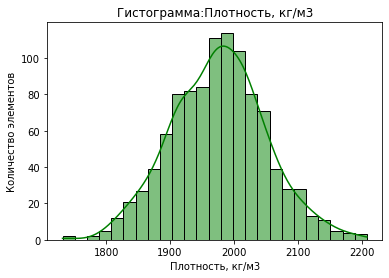

Минимальное значение: 1731.764635096
Максимальное значение: 2207.77348061119
Среднее значение: 1975.7348881101548
Медианное значение: 1977.62165679058


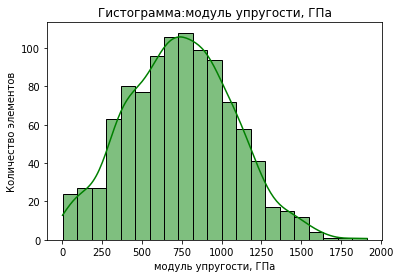

Минимальное значение: 2.4369087535075
Максимальное значение: 1911.53647700054
Среднее значение: 739.9232327560719
Медианное значение: 739.664327697792


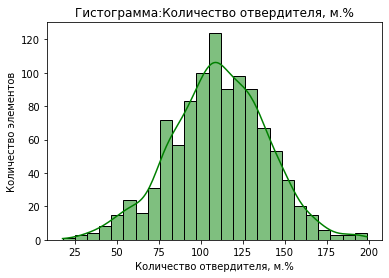

Минимальное значение: 17.7402745562519
Максимальное значение: 198.953207190451
Среднее значение: 110.57076864736258
Медианное значение: 110.564839894065


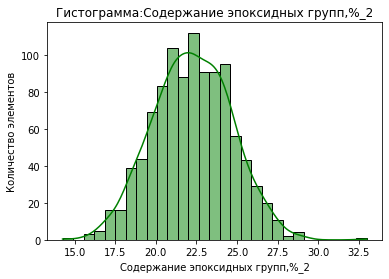

Минимальное значение: 14.2549854977161
Максимальное значение: 33.0
Среднее значение: 22.24438954776772
Медианное значение: 22.2307437560244


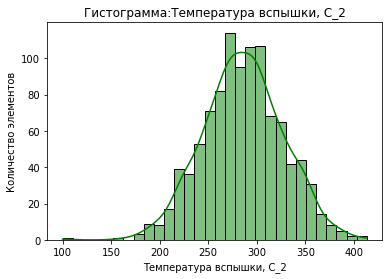

Минимальное значение: 100.0
Максимальное значение: 413.273418243566
Среднее значение: 285.88215135162227
Медианное значение: 285.896812331237


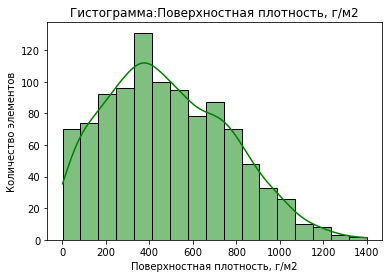

Минимальное значение: 0.603739925153945
Максимальное значение: 1399.54236233989
Среднее значение: 482.7318330384181
Медианное значение: 451.86436518306


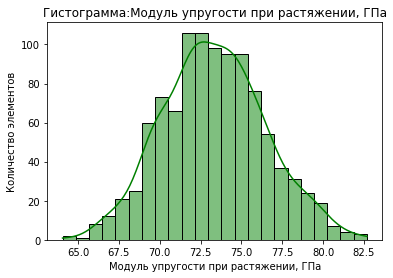

Минимальное значение: 64.0540605597917
Максимальное значение: 82.682051035271
Среднее значение: 73.32857125009073
Медианное значение: 73.2688045943481


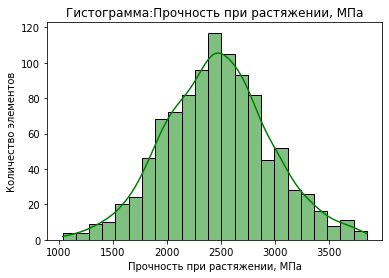

Минимальное значение: 1036.85660535
Максимальное значение: 3848.43673187618
Среднее значение: 2466.9228426979025
Медианное значение: 2459.52452600309


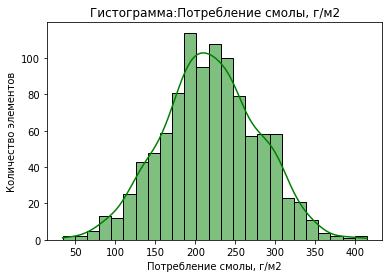

Минимальное значение: 33.8030255329625
Максимальное значение: 414.590628361534
Среднее значение: 218.42314367654265
Медианное значение: 219.198882195134


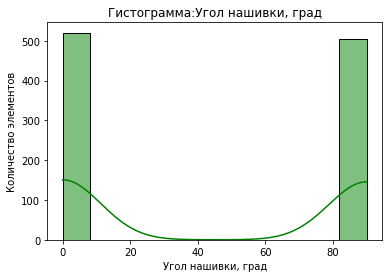

Минимальное значение: 0.0
Максимальное значение: 90.0
Среднее значение: 44.252199413489734
Медианное значение: 0.0


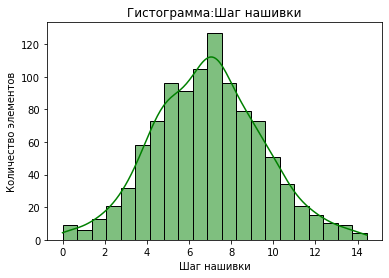

Минимальное значение: 0.0
Максимальное значение: 14.4405218753969
Среднее значение: 6.899222077675024
Медианное значение: 6.9161438559491


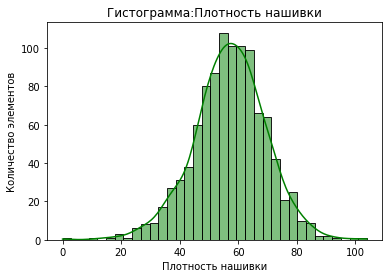

Минимальное значение: 0.0
Максимальное значение: 103.988901301494
Среднее значение: 57.15392943285763
Медианное значение: 57.3419198469929


In [17]:
for col in df_pr.columns:
    plt.figure(figsize=(6,4))
    plt.title('Гистограмма:'+''+ col)
    plt.ylabel('Количество элементов')
    sns.histplot(data = df_pr[col], kde=True, color='green')
    plt.show()
    print(f'Минимальное значение: {df_pr[col].min()}')
    print(f'Максимальное значение: {df_pr[col].max()}')
    print(f'Среднее значение: {df_pr[col].mean()}')
    print(f'Медианное значение: {df_pr[col].median()}')

*Гистограммы свидетельствуют о нрмальном распределении данных, кроме параметра "Угол нашивки, град", который имеет только 2 значения 0 и 90 градусов. Имеются выбросы. Например, выбросы отчетливо наблюдаются в гистограммах параметров "Соотношение матрица-наполнитель", "Количество ответрдителя", "Поверхностная плотность"*

#### Построим ящики с усами, чтобы убедиться в наличии выбросов

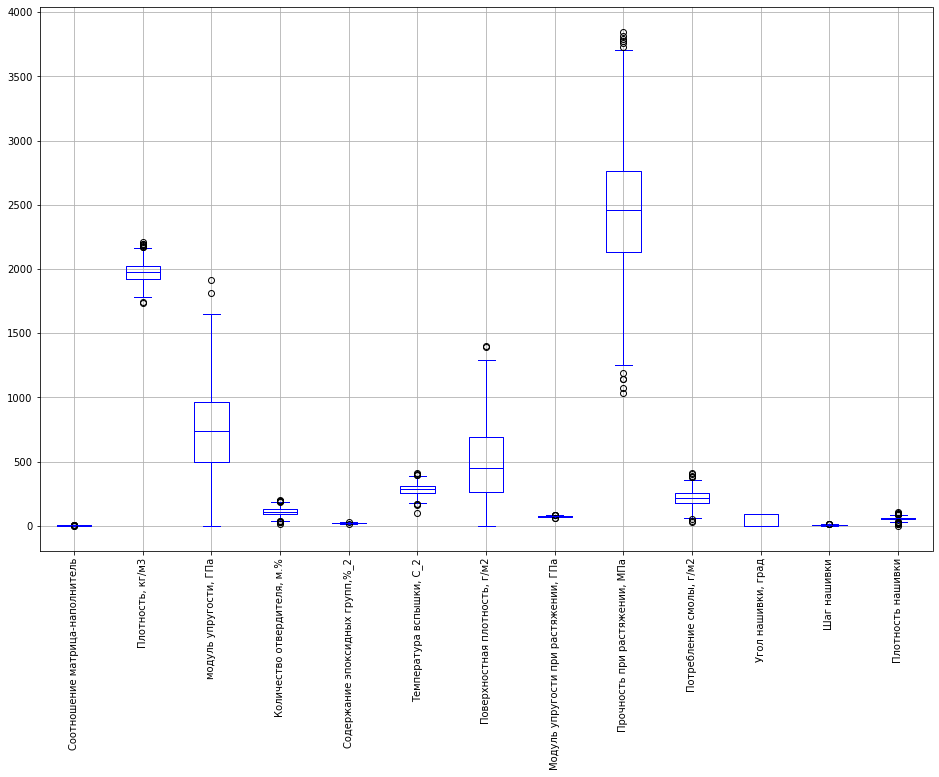

In [18]:
boxplot = df_pr.boxplot(rot=90, figsize=(16,10), color = 'Blue')

*Поскольку имеется большой разброс в диапазонах данных, то общая диаграмма ящиков с усами малоинформативна. На ней сложно увидеть есть ли выбросы в данных по параметрам Соотношение матрица-наполнитель, Содержание эпоксидных смол и др.

#### Построим ящики с усами отдельно для каждого параметра

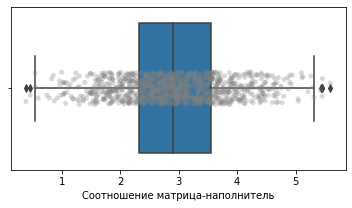

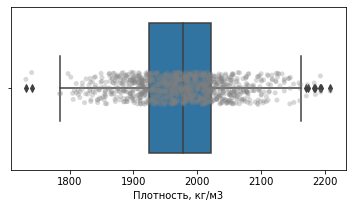

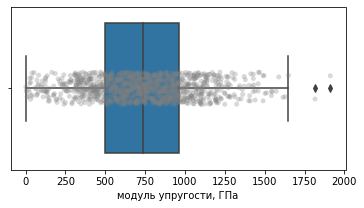

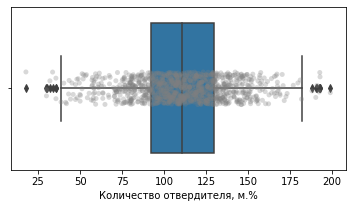

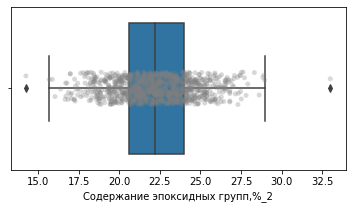

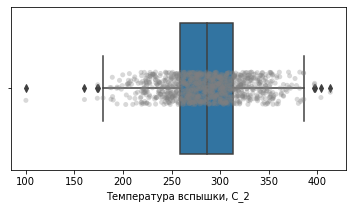

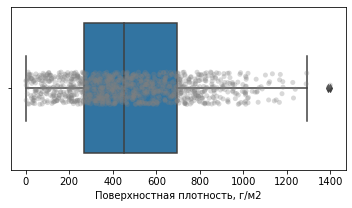

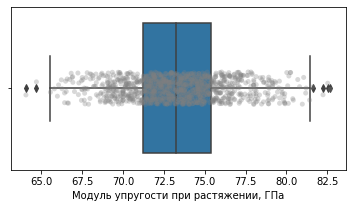

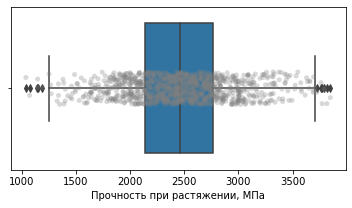

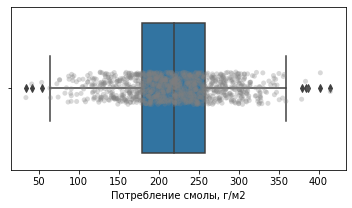

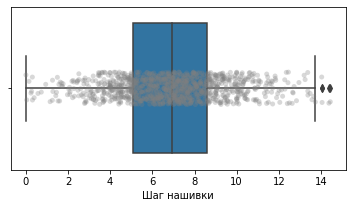

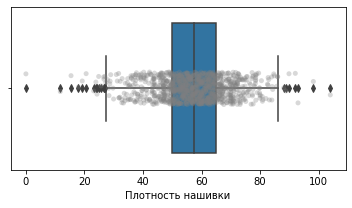

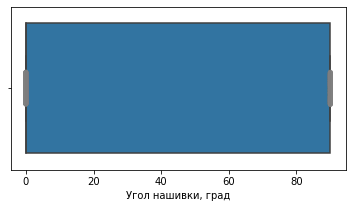

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Соотношение матрица-наполнитель"])
boxplot = sns.stripplot(x=df_pr["Соотношение матрица-наполнитель"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Плотность, кг/м3"])
boxplot = sns.stripplot(x=df_pr["Плотность, кг/м3"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["модуль упругости, ГПа"])
boxplot = sns.stripplot(x=df_pr["модуль упругости, ГПа"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Количество отвердителя, м.%"])
boxplot = sns.stripplot(x=df_pr["Количество отвердителя, м.%"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Содержание эпоксидных групп,%_2"])
boxplot = sns.stripplot(x=df_pr["Содержание эпоксидных групп,%_2"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Температура вспышки, С_2"])
boxplot = sns.stripplot(x=df_pr["Температура вспышки, С_2"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Поверхностная плотность, г/м2"])
boxplot = sns.stripplot(x=df_pr["Поверхностная плотность, г/м2"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Модуль упругости при растяжении, ГПа"])
boxplot = sns.stripplot(x=df_pr["Модуль упругости при растяжении, ГПа"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Прочность при растяжении, МПа"])
boxplot = sns.stripplot(x=df_pr["Прочность при растяжении, МПа"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Потребление смолы, г/м2"])
boxplot = sns.stripplot(x=df_pr["Потребление смолы, г/м2"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Шаг нашивки"])
boxplot = sns.stripplot(x=df_pr["Шаг нашивки"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Плотность нашивки"])
boxplot = sns.stripplot(x=df_pr["Плотность нашивки"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)

plt.figure(figsize=(6,3))
sns.boxplot(x=df_pr["Угол нашивки, град"])
boxplot = sns.stripplot(x=df_pr["Угол нашивки, град"], marker="o", alpha=0.3, color="grey")
plt.show(boxplot)


*Ящики с усами показывают, что выбросы есть в данных по всем переменным, кроме "Улга нашивки".*

#### Построим попарные графики рассеяния точек

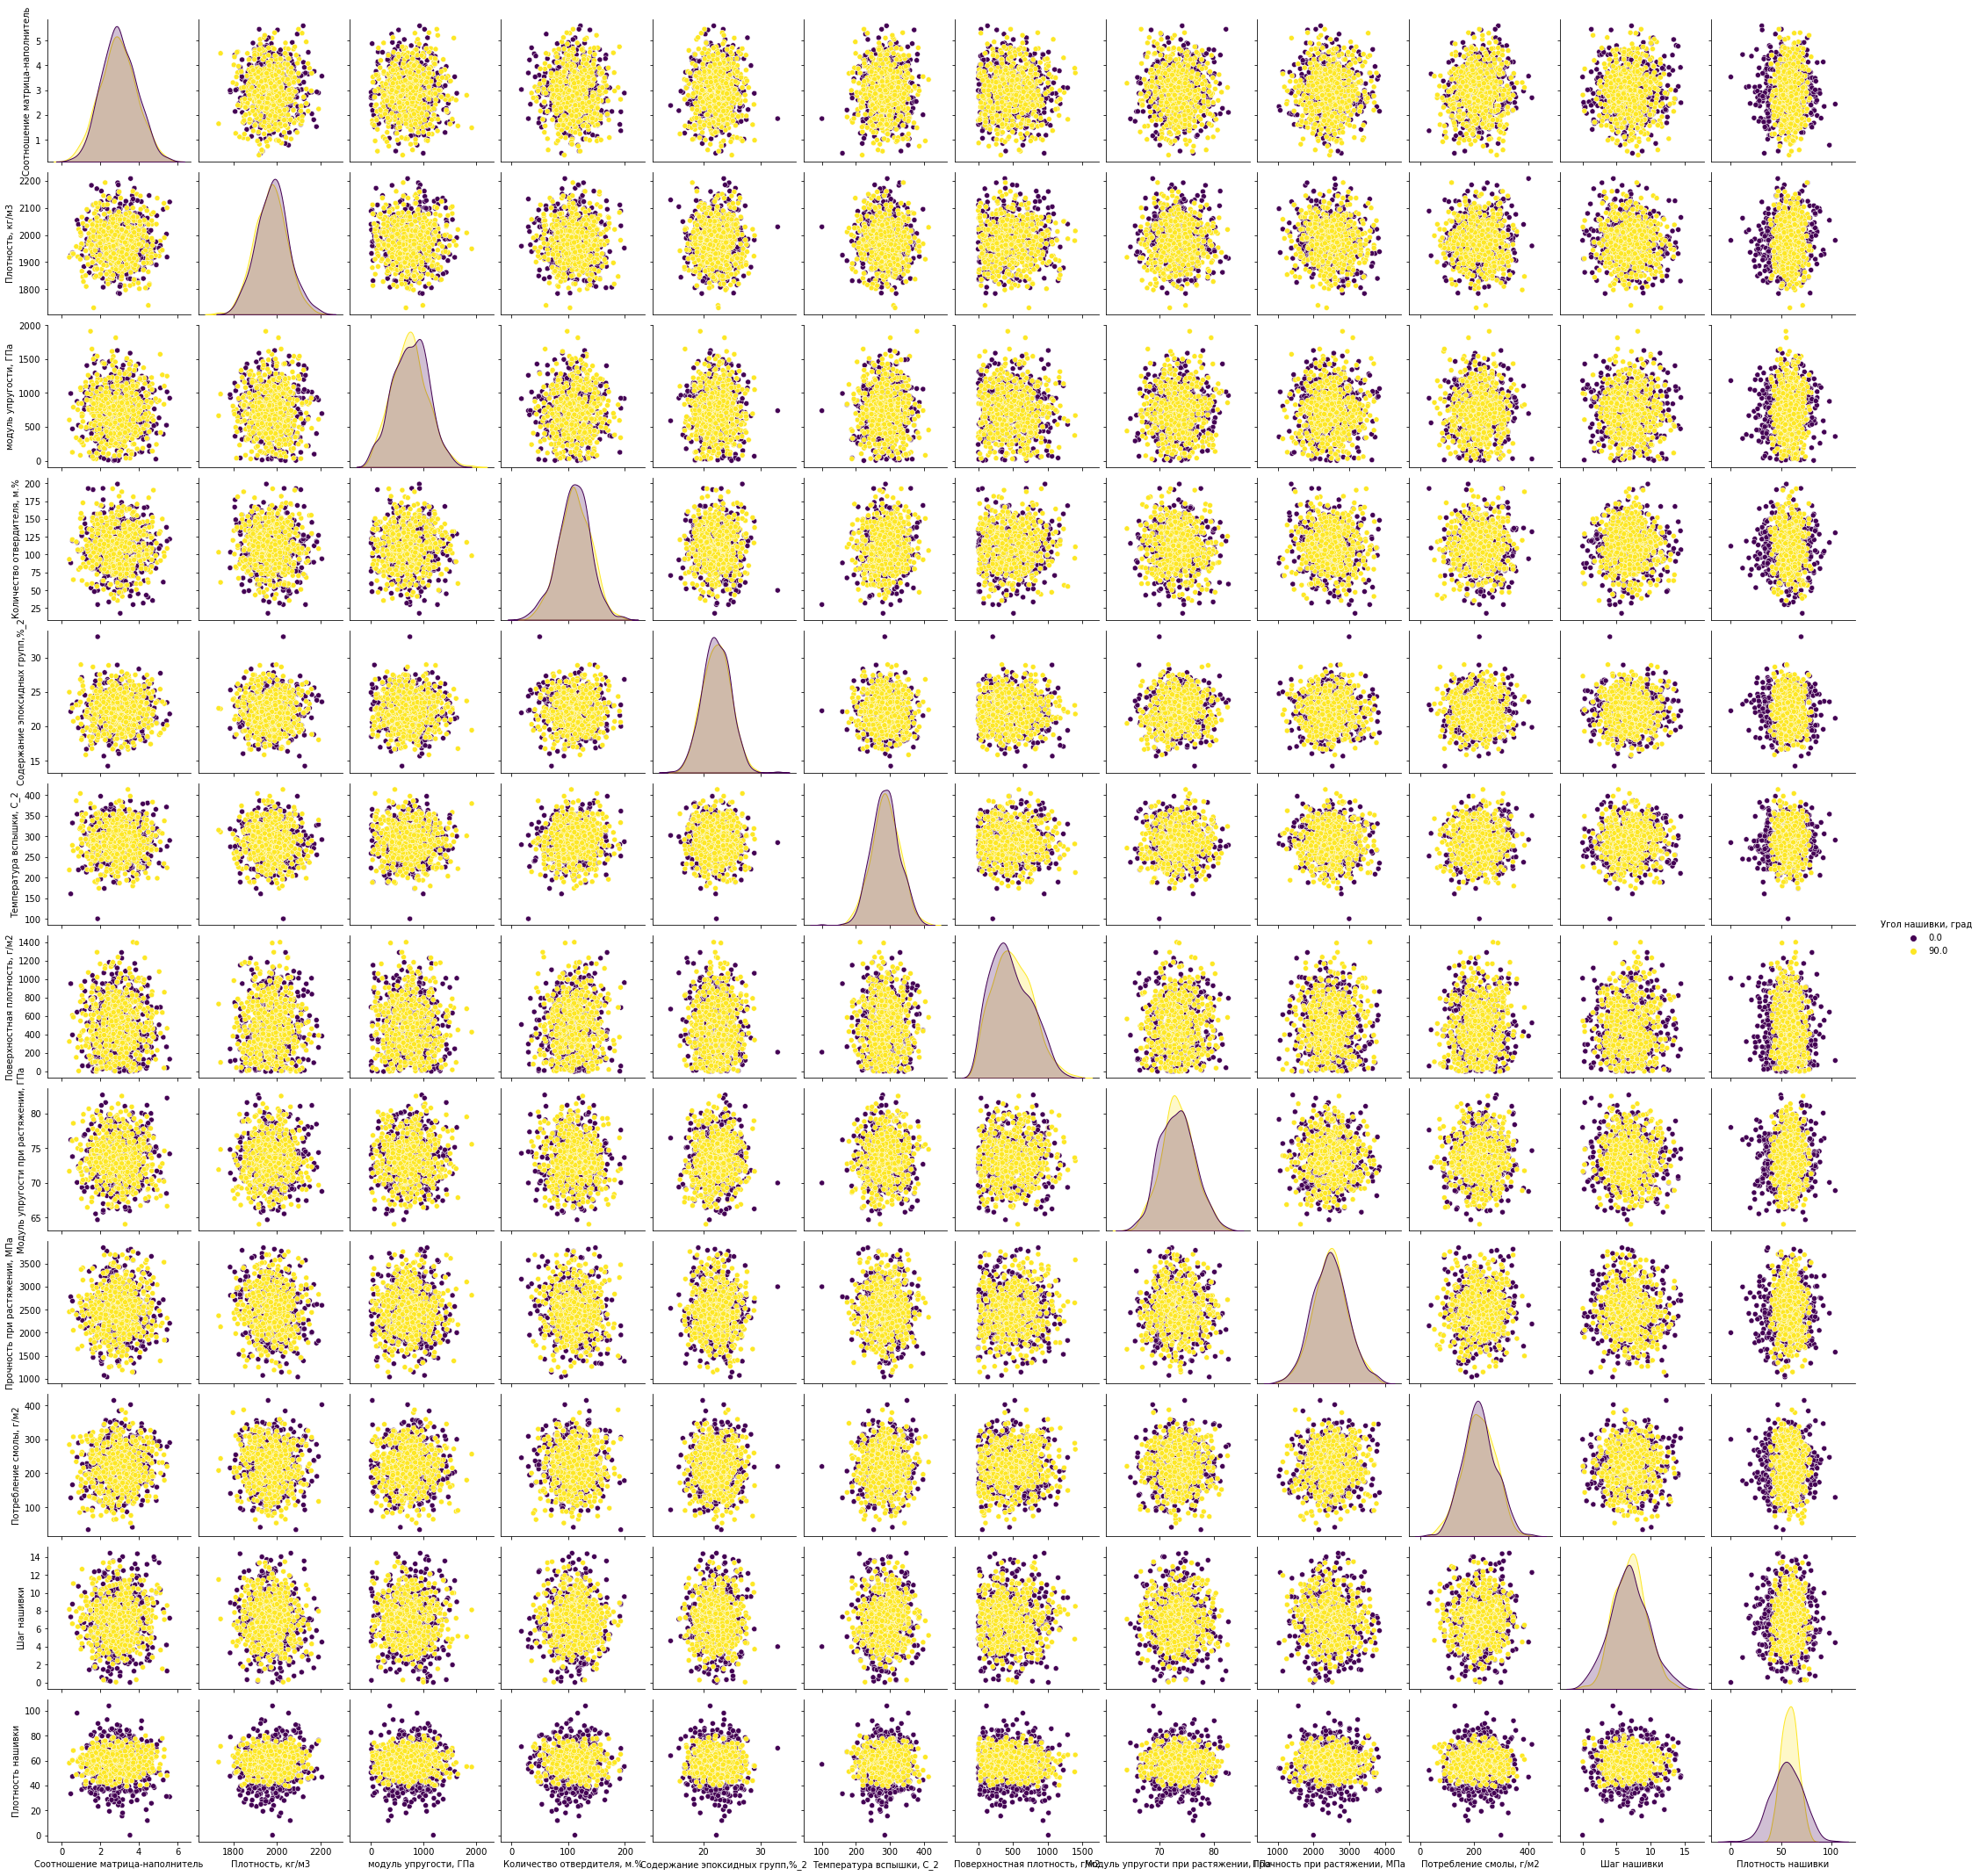

In [20]:
sns.pairplot(data=df_pr, hue = 'Угол нашивки, град', palette='viridis')

*Попарные графики рассеяния точек не показывают какой-либо корреляции между данными. На них также можно увидеть наличие выбросов*

#### Построим тепловую карту коэффициентов корреляции

<AxesSubplot:>

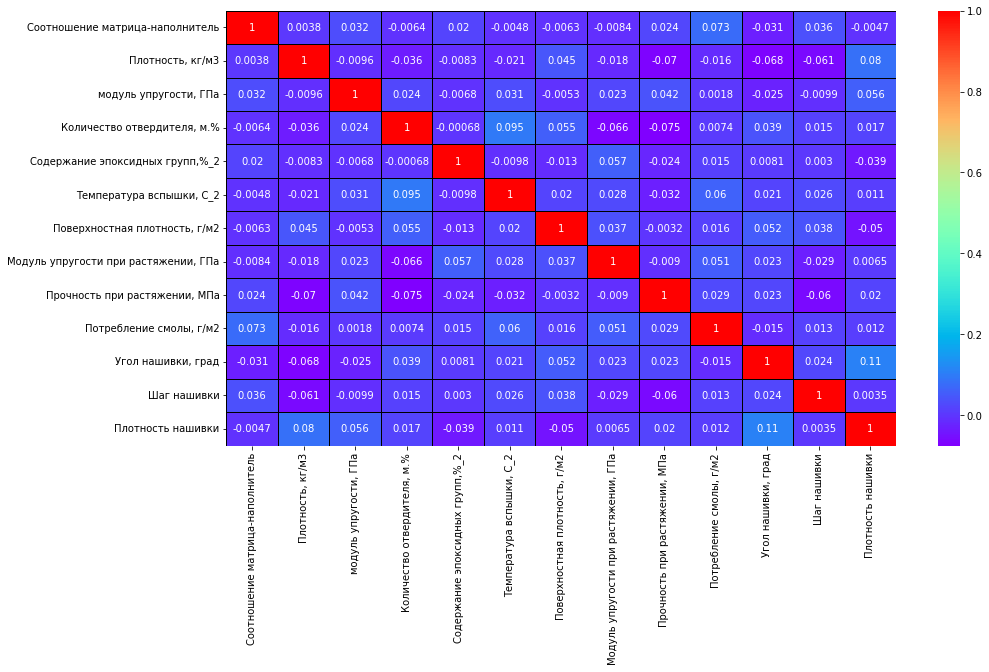

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(df_pr.corr(), cmap = 'rainbow', annot = True, linewidths=1, linecolor='black')

*Тепловая карта коэффициентов корреляции показывает максимальный уровень корреляции менее 0,1. Это свидетельствует об отсутствии зависимости параметров друг от друга
Наиболее сильную корреляцию имеют "Количество отвердителя" и "Температура вспышки".*

# Предобработка данных

Рассмотрим 2 способа определения количества выбросов: метод 3х сигм и метод межквартильных расстояний

#### Определение количества выбросов методом 3х сигм

In [22]:
count_3s = 0
count_iq = 0
for column in df_pr:
    d = df_pr.loc[:, [column]]
    zscore = (df_pr[column] - df_pr[column].mean())/ df_pr[column].std() 
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
print ('Метод 3-х сигм, выбросов:', count_3s)    

Метод 3-х сигм, выбросов: 24


#### Определение количества выбросов методом межквартильных расстояний

In [23]:
count_3s = 0
count_iq = 0
for column in df_pr:
    d = df_pr.loc[:, [column]]
    q1 = np.quantile(df_pr[column], 0.25)
    q3 = np.quantile(df_pr[column], 0.75)
    iqr = q3 - q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    d['iq'] = (df_pr[column] <= lower) | (df_pr[column] >= upper)
    count_iq += d['iq'].sum()
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод межквартильных расстояний, выбросов: 93


*Количество выбросов, полученных по методу 3-сигм меньше, чем количество выбросов, полученных при использовании метода межквартильных расстояний. Поэтому удалять выбросы будем методом 3-сигм*

### Удаляем выбросы методом 3-х сигм 

In [24]:
clean_outliers_df_pr = df_pr[(np.abs(stats.zscore(df_pr)) <= 3).all(axis=1)]
clean_outliers_df_pr

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
5.0                            2.767918       2000.000000   
6.0                            2.569620       1910.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                738.736842                    50.000000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
5.0                748.000000                   111.860000   
6.0                807.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                           23.750000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
5.0                           22.267857                284.615385   
6.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
5.0                        210.000000                             70.000000   
6.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
5.0                       3000.000000               220.000000   
6.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

### Нормализация данных 

Исследуем разброс диапазонов данных

<AxesSubplot:ylabel='Density'>

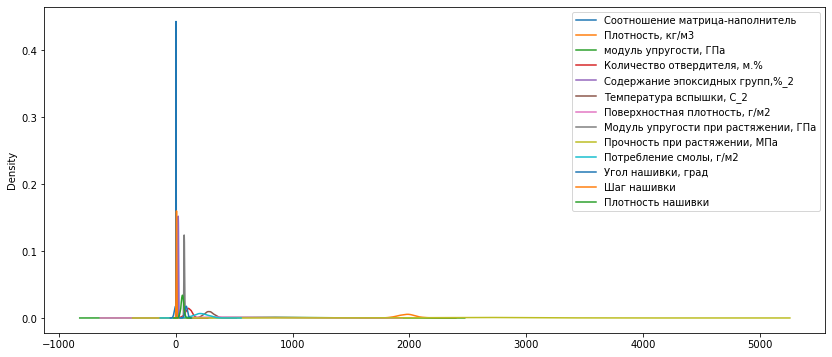

In [25]:
fig, ax = plt.subplots(figsize=(14,6))
clean_outliers_df_pr.plot(kind='kde', ax=ax)

Нормализуем данные

In [26]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(clean_outliers_df_pr), columns = clean_outliers_df_pr.columns, index=clean_outliers_df_pr.index)

In [27]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            0.282131          0.601381   
3.0                            0.282131          0.601381   
4.0                            0.457857          0.601381   
5.0                            0.457201          0.527898   
6.0                            0.419084          0.307448   
...                                 ...               ...   
1018.0                         0.361750          0.410540   
1019.0                         0.587163          0.650588   
1020.0                         0.555750          0.460227   
1021.0                         0.637396          0.691520   
1022.0                         0.657131          0.259472   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                  0.447061                     0.123047   
3.0                  0.447061                     0.608021   
4.0                  0.455721                     0.502800   
5.0                  0.452685                     0.502800   
6.0                  0.488508                     0.502800   
...                       ...                          ...   
1018.0               0.552781                     0.350139   
1019.0               0.268550                     0.712271   
1020.0               0.251612                     0.494656   
1021.0               0.448724                     0.684130   
1022.0               0.251903                     0.609147   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                            0.607435                  0.482823   
3.0                            0.418887                  0.549664   
4.0                            0.495653                  0.482823   
5.0                            0.495653                  0.482823   
6.0                            0.495653                  0.482823   
...                                 ...                       ...   
1018.0                         0.333908                  0.657301   
1019.0                         0.294428                  0.350746   
1020.0                         0.623085                  0.325580   
1021.0                         0.267818                  0.444436   
1022.0                         0.888354                  0.553803   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                          0.162230                              0.321894   
3.0                          0.162230                              0.321894   
4.0                          0.162230                              0.321894   
5.0                          0.162230                              0.321894   
6.0                          0.162230                              0.321894   
...                               ...                                   ...   
1018.0                       0.161609                              0.489229   
1019.0                       0.271207                              0.480019   
1020.0                       0.572959                              0.578197   
1021.0                       0.496511                              0.540754   
1022.0                       0.587373                              0.555208   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                          0.698235                 0.517418   
3.0                          0.698235                 0.517418   
4.0                          0.698235                 0.517418   
5.0                          0.698235                 0.517418   
6.0                          0.698235                 0.517418   
...                               ...                      ...   
1018.0                       0.480312                 0.242759   
1019.0                       0.470745                 0.221717   
1020.0                       0.578340                 0.565435   
1021.0                       0.368070                 0.451281   
1022.0                    

In [28]:
df_norm.describe().round(2).T

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       999.0  0.49  0.17  0.0  0.37  0.48   
Плотность, кг/м3                      999.0  0.47  0.18  0.0  0.34  0.47   
модуль упругости, ГПа                 999.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           999.0  0.50  0.17  0.0  0.38  0.50   
Содержание эпоксидных групп,%_2       999.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              999.0  0.49  0.17  0.0  0.37  0.49   
Поверхностная плотность, г/м2         999.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  999.0  0.50  0.17  0.0  0.39  0.50   
Прочность при растяжении, МПа         999.0  0.51  0.17  0.0  0.39  0.50   
Потребление смолы, г/м2               999.0  0.51  0.17  0.0  0.40  0.51   
Угол нашивки, град                    999.0  0.50  0.50  0.0  0.00  0.00   
Шаг нашивки                           999.0  0.48  0.18  0.0  0.35  0.48   
Плотность нашивки                     999.0  0.51  0.16  0.0  0.41  0.51   

                                       75%  max  
Соотношение матрица-наполнитель       0.61  1.0  
Плотность, кг/м3                      0.58  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.61  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.61  1.0  
Поверхностная плотность, г/м2         0.53  1.0  
Модуль упругости при растяжении, ГПа  0.61  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.63  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.59  1.0  
Плотность нашивки                     0.61  1.0

#### Построим гистограммы распределения каждого параметра после удаления выбросов и нормализации

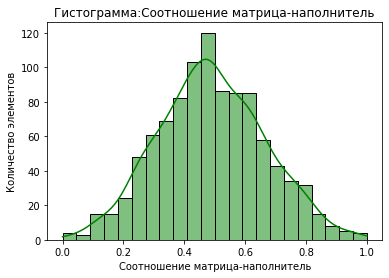

Минимальное значение: 0.0
Максимальное значение: 0.9999999999999998
Среднее значение: 0.4897271587862816
Медианное значение: 0.4842883361597614


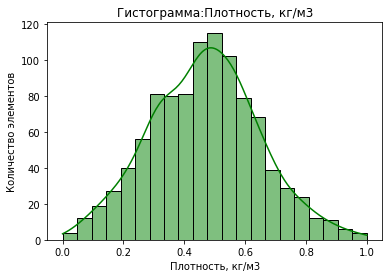

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.46779803627591143
Медианное значение: 0.4723912146909921


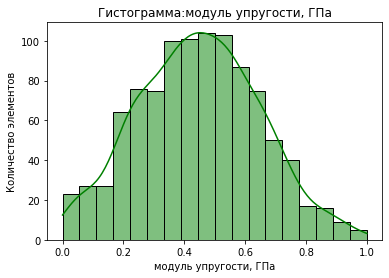

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.44688691815584874
Медианное значение: 0.44845758224922866


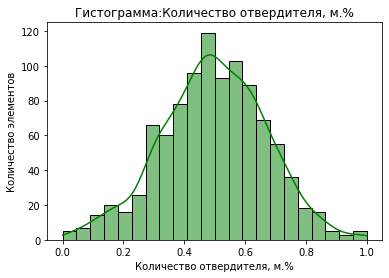

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.49674725063597786
Медианное значение: 0.4956158951946342


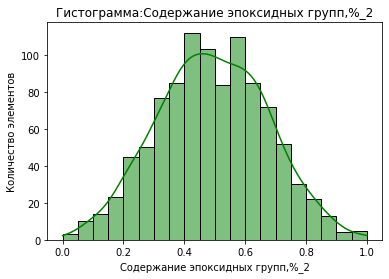

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.4930972634964968
Медианное значение: 0.4920510501711619


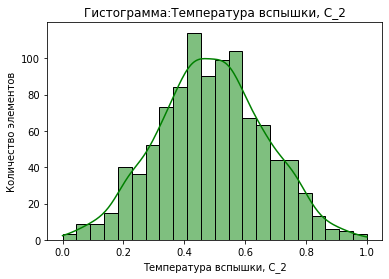

Минимальное значение: 0.0
Максимальное значение: 0.9999999999999999
Среднее значение: 0.4886854847876783
Медианное значение: 0.4883907460859086


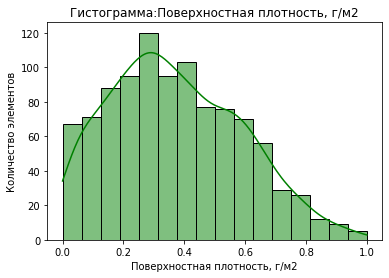

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.37105812936953736
Медианное значение: 0.34850304741295896


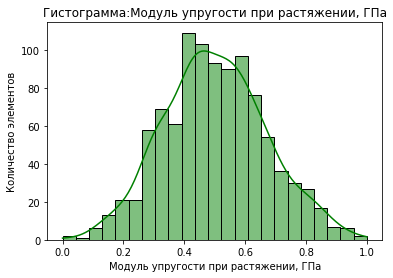

Минимальное значение: 0.0
Максимальное значение: 0.9999999999999996
Среднее значение: 0.5010225155186315
Медианное значение: 0.496176269570777


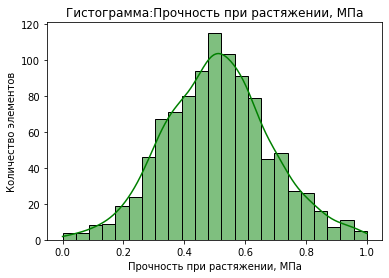

Минимальное значение: 0.0
Максимальное значение: 1.0000000000000002
Среднее значение: 0.5082730920069362
Медианное значение: 0.5048898980034642


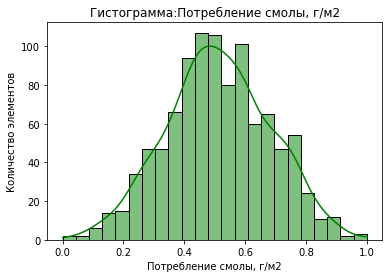

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.5121817055144455
Медианное значение: 0.5129334967021625


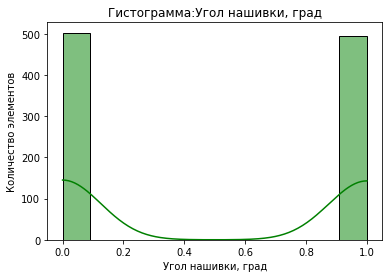

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.4964964964964965
Медианное значение: 0.0


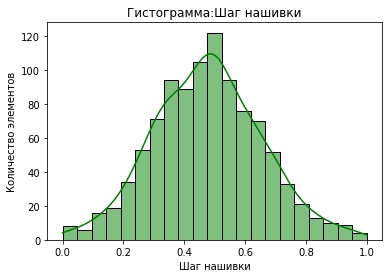

Минимальное значение: 0.0
Максимальное значение: 0.9999999999999999
Среднее значение: 0.4772026995013911
Медианное значение: 0.4784186783066072


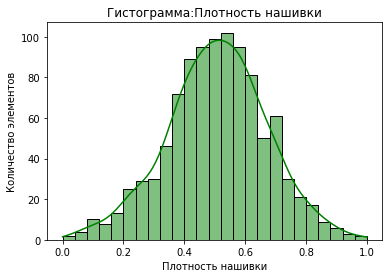

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.5071322444170497
Медианное значение: 0.5101175113047651


In [29]:
for col in df_norm.columns:
    plt.figure(figsize=(6,4))
    plt.title('Гистограмма:'+''+ col)
    plt.ylabel('Количество элементов')
    sns.histplot(data = df_norm[col], kde=True, color='green')
    plt.show()
    print(f'Минимальное значение: {df_norm[col].min()}')
    print(f'Максимальное значение: {df_norm[col].max()}')
    print(f'Среднее значение: {df_norm[col].mean()}')
    print(f'Медианное значение: {df_norm[col].median()}')

<AxesSubplot:ylabel='Density'>

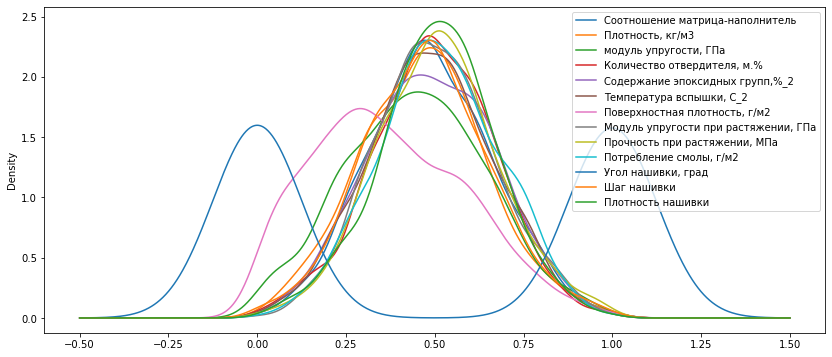

In [30]:
fig, ax = plt.subplots(figsize=(14,6))
df_norm.plot(kind='kde', ax=ax)

## Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

#### Определим входные  и выходные данные. Разобьем данные на обучающую и тестовую выборки в соотношении 70% и 30%

In [31]:
x_upr = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_norm[['Прочность при растяжении, МПа']]

x_train_upr, x_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
x_train_pr, x_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Размеры тестовой и обучающей выборки для прогноза Модуля упругости при растяжении

In [32]:
print("Размер тренировочного датасета на входе:", x_train_upr.shape)
print("Размер тестового датасета на входе:", x_test_upr.shape)
print("Размер тренировочного датасета на выходе:", y_train_upr.shape)
print("Размер тестового датасета на выходе:", y_test_upr.shape)

Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размер тестового датасета на выходе: (300, 1)


Размеры тестовой и обучающей выборки для прогноза Прочности при растяжении

In [33]:
print("Размер тренировочного датасета на входе:", x_train_pr.shape)
print("Размер тестового датасета на входе:", x_test_pr.shape)
print("Размер тренировочного датасета на выходе:", y_train_pr.shape)
print("Размер тестового датасета на выходе:", y_test_pr.shape)

Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размер тестового датасета на выходе: (300, 1)


### Линейная регрессия

In [34]:
from sklearn.linear_model import LinearRegression

#### Построим модель линейной регресси для прогноза Модуля упругости при растяжении

In [35]:
lr_u = LinearRegression()
lr_u.fit(x_train_upr, y_train_upr)
y_pred = pd.DataFrame(lr_u.predict(x_test_upr))

In [37]:
y_pred.head(5)

0
0  0.467676
1  0.476444
2  0.506871
3  0.521483
4  0.492049

Подбираем параметры для линейной регрессии

In [36]:
lr = LinearRegression()
lr_params = {'fit_intercept' : ['True', 'False']}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(x_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [37]:
lr_upr = GSCV_lr_upr.best_estimator_
lr_upr_result = pd.DataFrame({
    'Model':'LinearRegression_upr',
    'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(x_test_upr)).round(3),
    'R2 score': lr_upr.score(x_test_upr, y_test_upr).round(4)},
    index=['Модуль упругости при растяжении'])

In [38]:
lr_upr_result

Model    MAE  R2 score
Модуль упругости при растяжении  LinearRegression_upr  0.131   -0.0004

#### Построим модель линейной регресси для прогноза Прочности при растяжении

In [39]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(x_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [40]:
lr_pr = GSCV_lr_pr.best_estimator_
lr_pr_result = pd.DataFrame({
    'Model':'LinearRegression_pr',
    'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(x_test_pr)).round(3),
    'R2 score': lr_pr.score(x_test_pr, y_test_pr).round(3)},
    index=['Прочность при растяжении'])
lr_pr_result

Model    MAE  R2 score
Прочность при растяжении  LinearRegression_pr  0.142    -0.025

*Если коэффициент R2=0, это означает, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной. Если R2<0, то это означает, что разработанная модель дает прогноз даже хуже, чем простое усреднение.* 

### Случайный лес

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Модель случайный лес для Модуля упругости при растяжении

Построим модель случайный лес с базовыми параметрами

In [42]:
rfr = RandomForestRegressor()
rfr.fit(x_train_upr, y_train_upr.values.ravel())
rfr.predict(x_test_upr)

array([0.45782278, 0.53177585, 0.50884301, 0.48511843, 0.50644666,
       0.5552514 , 0.55678021, 0.51480381, 0.52947305, 0.45081813,
       0.47188504, 0.48972677, 0.47397854, 0.50910914, 0.53892994,
       0.45310034, 0.41457426, 0.48606096, 0.49355605, 0.47421376,
       0.49629811, 0.55932268, 0.56775694, 0.51873042, 0.47596754,
       0.49101751, 0.39422004, 0.55399023, 0.48428561, 0.48957933,
       0.54349666, 0.51545087, 0.46577874, 0.51352817, 0.5343514 ,
       0.5081162 , 0.50807788, 0.47793695, 0.52257126, 0.48406498,
       0.54611347, 0.49830164, 0.52414531, 0.56494606, 0.5021671 ,
       0.43149114, 0.52738647, 0.41899301, 0.44087447, 0.5215331 ,
       0.49222089, 0.47873324, 0.46905894, 0.51335861, 0.49696333,
       0.46520196, 0.52082257, 0.50458088, 0.42648527, 0.53677663,
       0.53018364, 0.46960705, 0.46626238, 0.49728416, 0.50964733,
       0.58786585, 0.44124815, 0.50184248, 0.49098224, 0.50095713,
       0.49250671, 0.57147414, 0.52606218, 0.48741124, 0.45602

In [43]:
y_test_upr

Модуль упругости при растяжении, ГПа
524.0                              0.420055
626.0                              0.304966
468.0                              0.507512
380.0                              0.765964
249.0                              0.748951
...                                     ...
475.0                              0.119709
428.0                              0.575018
65.0                               0.526595
357.0                              0.710121
359.0                              0.745552

[300 rows x 1 columns]

In [44]:
MAE = mean_absolute_error(y_test_upr, rfr.predict(x_test_upr))
R2 = rfr.score(x_test_upr, y_test_upr).round(3)
rfr_upr_result = pd.DataFrame({
    'Model':'RandomForestRegression_upr',
    'MAE': MAE.round(3),
    'R2 score': R2},
    index=['Модуль упругости при растяжении'])
rfr_upr_result

Model    MAE  R2 score
Модуль упругости при растяжении  RandomForestRegression_upr  0.136    -0.068

**Пробуем подобрать лучшие параметры**

n_estimator - число деревьев в лесу. 

max_depth - глубина дерева. 

min_samples_leaf - минимальное число образцов в листах. 

min_samples_leaf - минимальное число образцов для сплита. 

In [45]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'max_depth' : range(1,7),
    'min_samples_split' : range(10, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'max_features' : ['log2', 'sqrt'],
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(x_train_upr, y_train_upr.values.ravel())
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 860,
 'min_samples_split': 45,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': 'False'}

Пробуем обучить модель с указанными поученными параметрами.

In [46]:
rfr_upr_M = RandomForestRegressor(n_estimators = 860, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 6, 
                                  max_features = 'sqrt',
                                  max_depth = 1, 
                                  bootstrap = 'False')
rfr_upr_M.fit(x_train_upr, y_train_upr.values.ravel())
MAE_M = mean_absolute_error(y_test_upr, rfr_upr_M.predict(x_test_upr))
R2_M = rfr_upr_M.score(x_test_upr, y_test_upr).round(3)
rfr_upr_M_result = pd.DataFrame({
    'Model':'RandomForestRegression_upr_RSCV',
    'MAE': MAE_M.round(3),
    'R2 score': R2_M},
    index=['Модуль упругости при растяжении'])
rfr_upr_M_result

Model    MAE  \
Модуль упругости при растяжении  RandomForestRegression_upr_RSCV  0.131   

                                 R2 score  
Модуль упругости при растяжении     0.002

*При запуске модели с подобранными параметрами R2 становится положительным числом. При использовании модели с параметрами по умолчанию R2 был отрицательным. Следовательно, подобранные параметры улучшают качество работы модели, но оно все еще очень низкое.
Так как коэффициент R2 практически равен 0, это означает, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной.
Это можно увидеть визуально, если вывести прогнозные значения Модуля упругости при растяжении (см. ниже).*

In [47]:
rfr_upr_M.predict(x_test_upr)

array([0.497308  , 0.49884272, 0.50477303, 0.50431569, 0.50395422,
       0.50809973, 0.50444381, 0.50210656, 0.50565092, 0.50307793,
       0.49703444, 0.51094231, 0.49308651, 0.49986085, 0.50542042,
       0.50618462, 0.49237814, 0.4987141 , 0.50072963, 0.50106364,
       0.50274008, 0.50698959, 0.50476257, 0.49893616, 0.49906192,
       0.50241336, 0.48655143, 0.4990988 , 0.50022398, 0.5059074 ,
       0.50306085, 0.49998862, 0.49427623, 0.50204791, 0.50648125,
       0.50524528, 0.50077554, 0.49816869, 0.50376439, 0.49842736,
       0.50476666, 0.50118236, 0.49679035, 0.50430864, 0.50543404,
       0.49998787, 0.49980913, 0.5011175 , 0.49254393, 0.50629916,
       0.50220869, 0.49397985, 0.49773129, 0.49852285, 0.50229062,
       0.49862278, 0.51154907, 0.49941904, 0.49533844, 0.50668967,
       0.49690969, 0.49344928, 0.4959743 , 0.5006147 , 0.49877773,
       0.5094904 , 0.50309832, 0.50501475, 0.50324417, 0.5051229 ,
       0.49472954, 0.50568574, 0.50252276, 0.5001063 , 0.50684

Мы можем обратиться к атрибуту best_params_ для получения сведений о наборе параметров, позволяющем создать самую лучшую модель. Но на данной стадии это может не дать нам наиболее интересных данных о диапазонах параметров, которые стоит изучить на следующем раунде оптимизации. Для того чтобы выяснить то, в каком диапазоне значений стоит продолжать поиск, мы можем получить датафрейм, содержащий результаты работы алгоритма RandomizedSearchCV.

In [48]:
rs_df = pd.DataFrame(RSCV_rfr_upr.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                860                      45                      6   
1                110                      35                      7   
2                920                      45                      5   
3                770                      20                      4   
4                250                      15                      4   
5                410                      45                      5   
6                360                      45                      2   
7                 20                      45                      5   
8                 50                      35                      4   
9                490                      10                      5   

  param_max_features param_max_depth param_bootstrap  split3_test_score  \
0               sqrt               1           False          -0.009138   
1               sqrt               1            True          -0.008022   
2               log2               3           False          -0.017519   
3               sqrt               3           False          -0.017847   
4               log2               3            True          -0.015441   
5               log2               5           False          -0.018286   
6               sqrt               4            True          -0.018571   
7               sqrt               3            True          -0.046398   
8               log2               6            True          -0.019770   
9               sqrt               6            True          -0.021447   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0          -0.010930          -0.010821          -0.000896          -0.000740   
1          -0.015068          -0.011933          -0.003960           0.000573   
2          -0.011304          -0.012263           0.003125          -0.004443   
3          -0.008164          -0.011362           0.004339          -0.002860   
4          -0.009675          -0.010470          -0.002916          -0.007918   
5          -0.010735          -0.014951           0.001621          -0.014211   
6          -0.005669          -0.012067          -0.003399          -0.010411   
7          -0.015500          -0.029920           0.005898          -0.004661   
8           0.023774          -0.016368           0.014553          -0.010782   
9          -0.012654          -0.015958           0.002359          -0.014008   

   split8_test_score  split9_test_score  mean_test_score  rank_test_score  
0          -0.015875          -0.002355        -0.021270                1  
1          -0.011443          -0.008755        -0.022120                2  
2          -0.011919          -0.013337        -0.028930                3  
3          -0.009305          -0.016223        -0.029796                4  
4          -0.009072          -0.018810        -0.030151                5  
5           0.005951          -0.021920        -0.032502                6  
6          -0.011159          -0.021318        -0.032782                7  
7          -0.029286          -0.017486        -0.036601                8  
8          -0.029242          -0.019384        -0.038175                9  
9           0.001503          -0.020040        -0.038268               10

Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

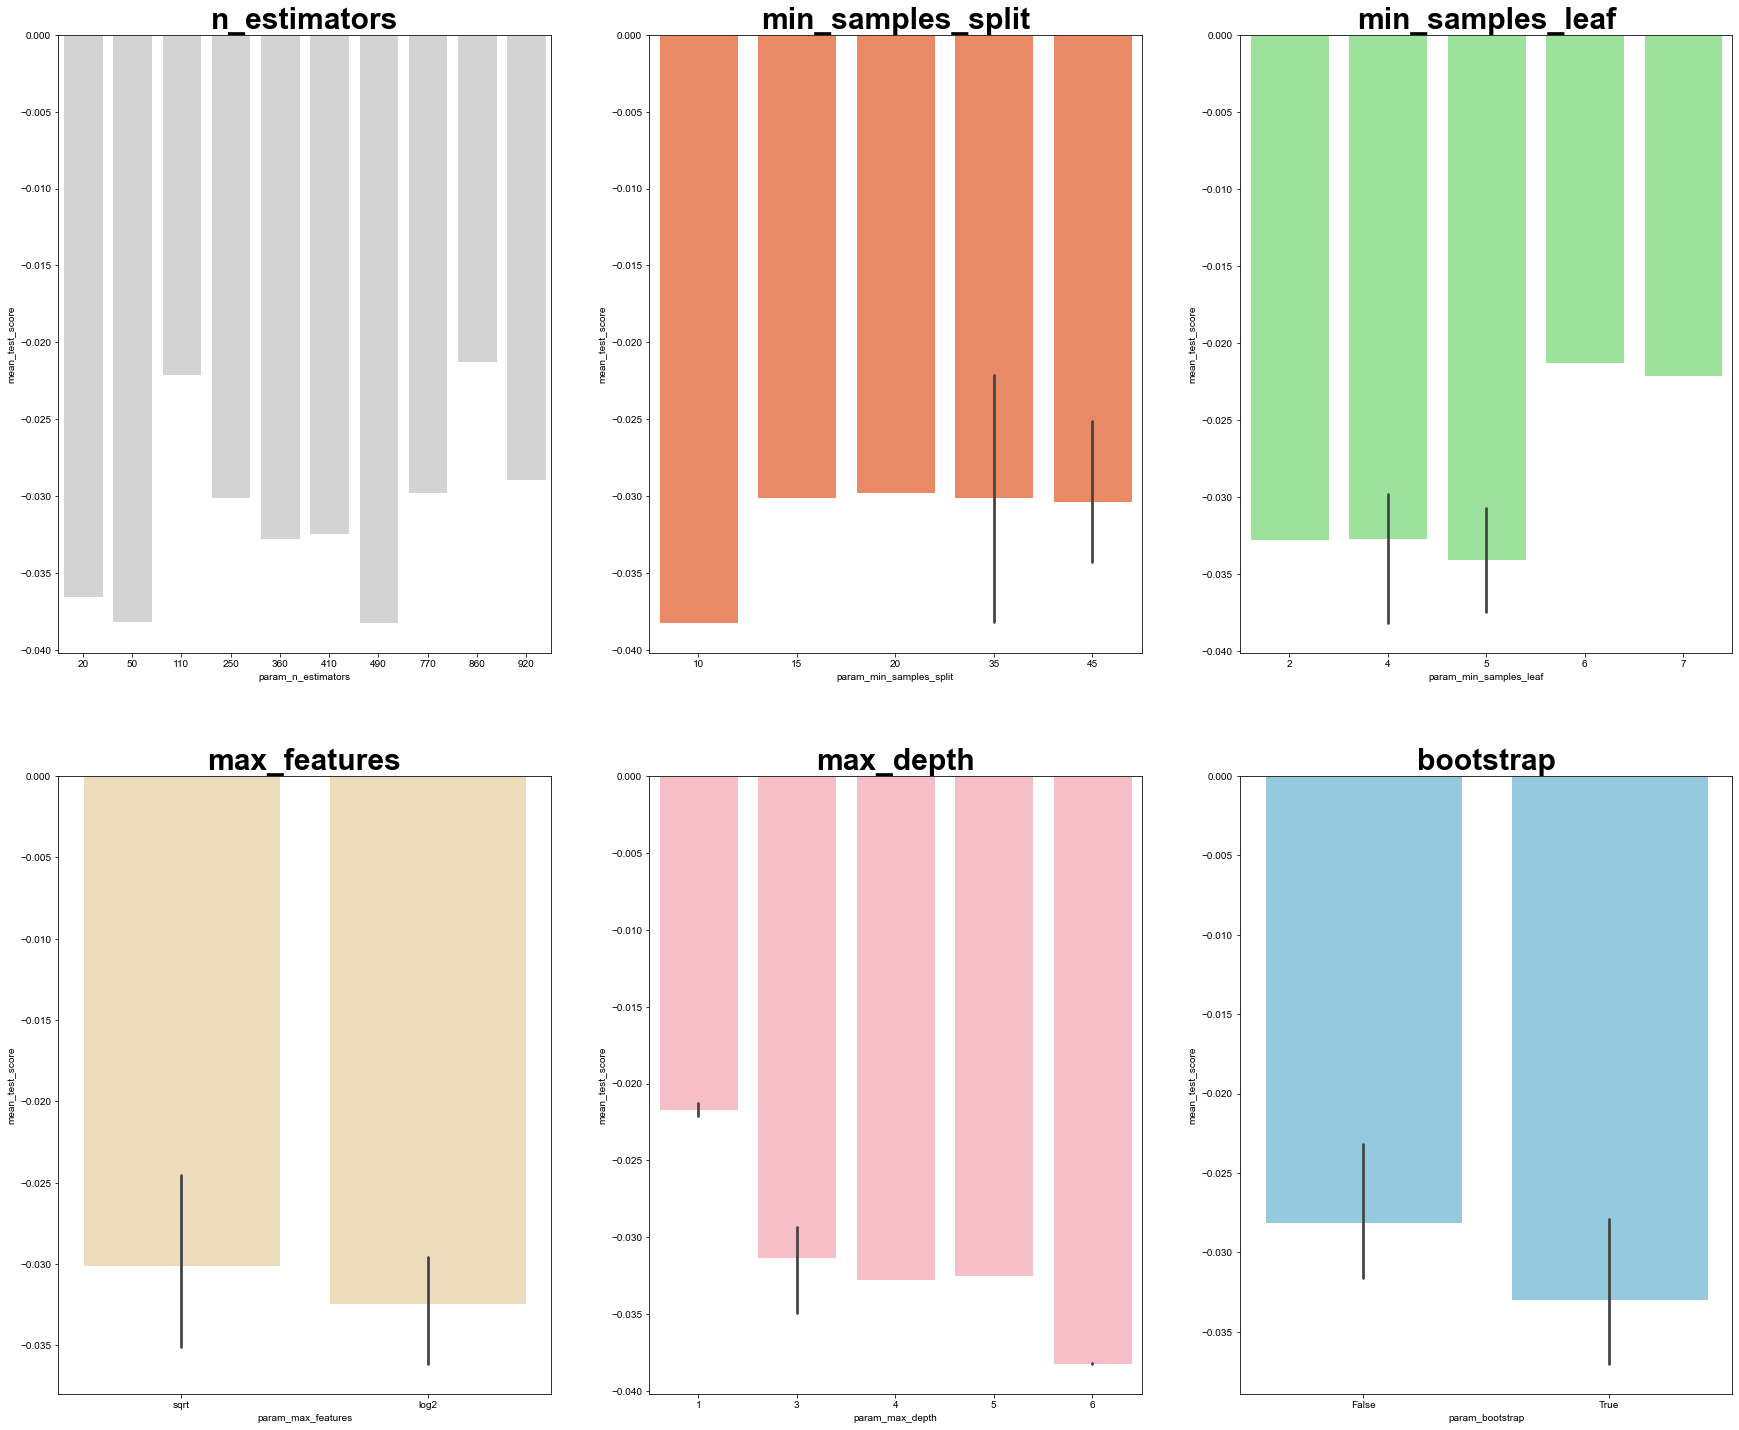

In [49]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

# Если проанализировать вышеприведённые графики, то можно заметить вещи, говорящие о том, как, в среднем, каждое значение гиперпараметра влияет на модель.

n_estimators: значения 110 и 860 показывают наилучшие средние результаты.  
min_samples_split: Одинаково выглядят значения 15, 20, 35 и 45.   
min_samples_leaf: Попробуем 6 и 7.  
max_features: вариант sqrt даёт результат чуть лучше, чем log2. 
max_depth: Хорошо выглядят значение 1. 
bootstrap: значение False показывает наилучший средний результат.

In [50]:
from sklearn.model_selection import GridSearchCV
n_estimators = [110, 860]
max_features = ['sqrt']
max_depth = [1,2]
min_samples_split = [15,20,35,45]
min_samples_leaf = [6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfr, param_grid, cv = 10, verbose = 1, n_jobs=-1)
gs.fit(x_train_upr, y_train_upr.values.ravel())
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


{'bootstrap': False,
 'max_depth': 1,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 45,
 'n_estimators': 110}

In [51]:
rfr_upr_GSCV = RandomForestRegressor(n_estimators = 110, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 6, 
                                  max_features = 'sqrt',
                                  max_depth = 1, 
                                  bootstrap = 'False')
rfr_upr_GSCV.fit(x_train_upr, y_train_upr.values.ravel())
MAE_GSCV = mean_absolute_error(y_test_upr, rfr_upr_GSCV.predict(x_test_upr))
R2_GSCV = rfr_upr_GSCV.score(x_test_upr, y_test_upr).round(3)
rfr_upr_GSCV_result = pd.DataFrame({
    'Model':'RandomForestRegression_upr_GSCV',
    'MAE': MAE_GSCV.round(3),
    'R2 score': R2_GSCV},
    index=['Модуль упругости при растяжении'])
rfr_upr_GSCV_result

Model    MAE  \
Модуль упругости при растяжении  RandomForestRegression_upr_GSCV  0.131   

                                 R2 score  
Модуль упругости при растяжении     0.004

Даже после попытки двуступенчатого подбора параметров результат работы модели не намного улучшился. R2 из отрицательного значения он стал положительным.

Если коэффициент R2=0, это означает, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной. Если R2<0, то это означает, что разработанная модель дает прогноз даже хуже, чем простое усреднение. 

#### Модель случайный лес для Прочности при растяжении

In [52]:
rfr_pr = RandomForestRegressor()
rfr_pr.fit(x_train_pr, y_train_pr.values.ravel())
rfr_pr.predict(x_test_pr)

array([0.50323168, 0.47668376, 0.51991727, 0.45780715, 0.49671423,
       0.55703161, 0.53134712, 0.51914249, 0.53006052, 0.51414389,
       0.56897939, 0.51273807, 0.42991386, 0.60950425, 0.43726042,
       0.50481213, 0.41086396, 0.47712668, 0.47779464, 0.47013672,
       0.51228677, 0.54169265, 0.50733589, 0.49774338, 0.56637955,
       0.41049015, 0.5364739 , 0.53317232, 0.50360995, 0.51272674,
       0.49471706, 0.52997052, 0.51110199, 0.59467555, 0.45514943,
       0.50608475, 0.52743384, 0.44951058, 0.48275062, 0.39290882,
       0.56627173, 0.50466703, 0.4254529 , 0.46888034, 0.49711339,
       0.48657848, 0.50228382, 0.50157747, 0.45954858, 0.52028369,
       0.46576154, 0.50097391, 0.48120528, 0.49234129, 0.55166646,
       0.48914247, 0.51345097, 0.50390546, 0.43746055, 0.56146485,
       0.48464   , 0.43597014, 0.52219389, 0.52967447, 0.49534246,
       0.59677451, 0.42633788, 0.50772801, 0.56227124, 0.49098625,
       0.45618179, 0.52803475, 0.53643759, 0.46322378, 0.48372

In [53]:
rfr_pr_result = pd.DataFrame({
    'Model':'RandomForestRegression_pr',
    'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(x_test_pr)).round(3),
    'R2 score': rfr_pr.score(x_test_pr, y_test_pr).round(3)},
    index=['Прочность при растяжении'])
rfr_pr_result

Model    MAE  R2 score
Прочность при растяжении  RandomForestRegression_pr  0.143    -0.052

Пробуем подобрать лучшие параметры с помощью RandomizedSearchCV

In [54]:
RSCV_rfr_pr = RandomizedSearchCV(rfr_pr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(x_train_pr, y_train_pr.values.ravel())
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 740,
 'min_samples_split': 45,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5,
 'bootstrap': 'False'}

In [56]:
rfr_pr_M = RandomForestRegressor(n_estimators = 740, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 4, 
                                  max_features = 'log2',
                                  max_depth = 5, 
                                  bootstrap = 'False')
rfr_pr_M = RSCV_rfr_pr.best_estimator_
rfr_pr_M_result = pd.DataFrame({
    'Model':'RandomForestRegression_pr_RSCV',
    'MAE': mean_absolute_error(y_test_pr, rfr_pr_M.predict(x_test_pr)).round(3),
    'R2 score': rfr_pr_M.score(x_test_pr, y_test_pr).round(3)},
    index=['Прочность при растяжении'])
rfr_pr_M_result

Model    MAE  R2 score
Прочность при растяжении  RandomForestRegression_pr_RSCV  0.139    -0.009

А теперь попробуем подобрать параметры с помощью GridSearchCV

In [57]:
param_grid = [{'n_estimators' : [30, 100, 300],  
             'bootstrap' : [False, True],
             'min_samples_leaf' : [2, 4, 6, 8],
             'max_features' : ['log2', 'sqrt']}]
grid_search = GridSearchCV(rfr_pr, param_grid, cv= 10, verbose = 1, n_jobs=-1)
grid_search.fit(x_train_pr, y_train_pr.values.ravel())
grid_search.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'n_estimators': 300}

In [58]:
rfr_pr_GSCV = RandomForestRegressor(n_estimators = 300, 
                                  min_samples_leaf = 4, 
                                  max_features = 'sqrt',
                                  bootstrap = 'True')
rfr_pr_GSCV = grid_search.best_estimator_
rfr_pr_GSCV_result = pd.DataFrame({
    'Model':'RandomForestRegression_pr_GSCV',
    'MAE': mean_absolute_error(y_test_pr, rfr_pr_GSCV.predict(x_test_pr)).round(3),
    'R2 score': rfr_pr_GSCV.score(x_test_pr, y_test_pr).round(3)},
    index=['Прочность при растяжении'])
rfr_pr_GSCV_result

Model    MAE  R2 score
Прочность при растяжении  RandomForestRegression_pr_GSCV  0.141     -0.01

*Прочность при растяжении модель случайный лес предсказывает хуже, чем если бы мы взяли среднее значение. После подбора параметров качество модели практически не изменилось.*

### Предсказание Соотношения матрица-наполнитель по методу ближайших соседей

Создаем выборку

In [59]:
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]
output_columns_names = ["Соотношение матрица-наполнитель"]

x = df_norm[input_columns_names]
y = df_norm[output_columns_names]


Делим выборку на тестовую и обучающую

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Сделаем прогноз с использованием модели Ближайших соседей

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor()

In [63]:
param_grid = {
    'n_neighbors':[1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(x_train, y_train)
GSCV.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 20}

In [64]:
knn.fit(x_train, y_train)
prediction=knn.predict(x_test)
print(np.mean((y_test - prediction)*(y_test - prediction))) 

Соотношение матрица-наполнитель    0.037823
dtype: float64


In [65]:
prediction=knn.predict(x_test)

In [66]:
knn_result = pd.DataFrame({
    'Model':'KNeighborsRegressor',
    'MAE': mean_absolute_error(y_test, knn.predict(x_test)).round(3),
    'R2 score': knn.score(x_test, y_test).round(3)},
    index=['Соотношение матрица-наполнитель'])
knn_result

Model   MAE  R2 score
Соотношение матрица-наполнитель  KNeighborsRegressor  0.16    -0.243

## Построение нейронной сети для предсказания соотношения матрица-наполнитель

In [67]:
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]
output_columns_names = ["Соотношение матрица-наполнитель"]

x = df_norm[input_columns_names]
y = df_norm[output_columns_names]

In [68]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [69]:
print(x.shape, y.shape)

(999, 12) (999, 1)


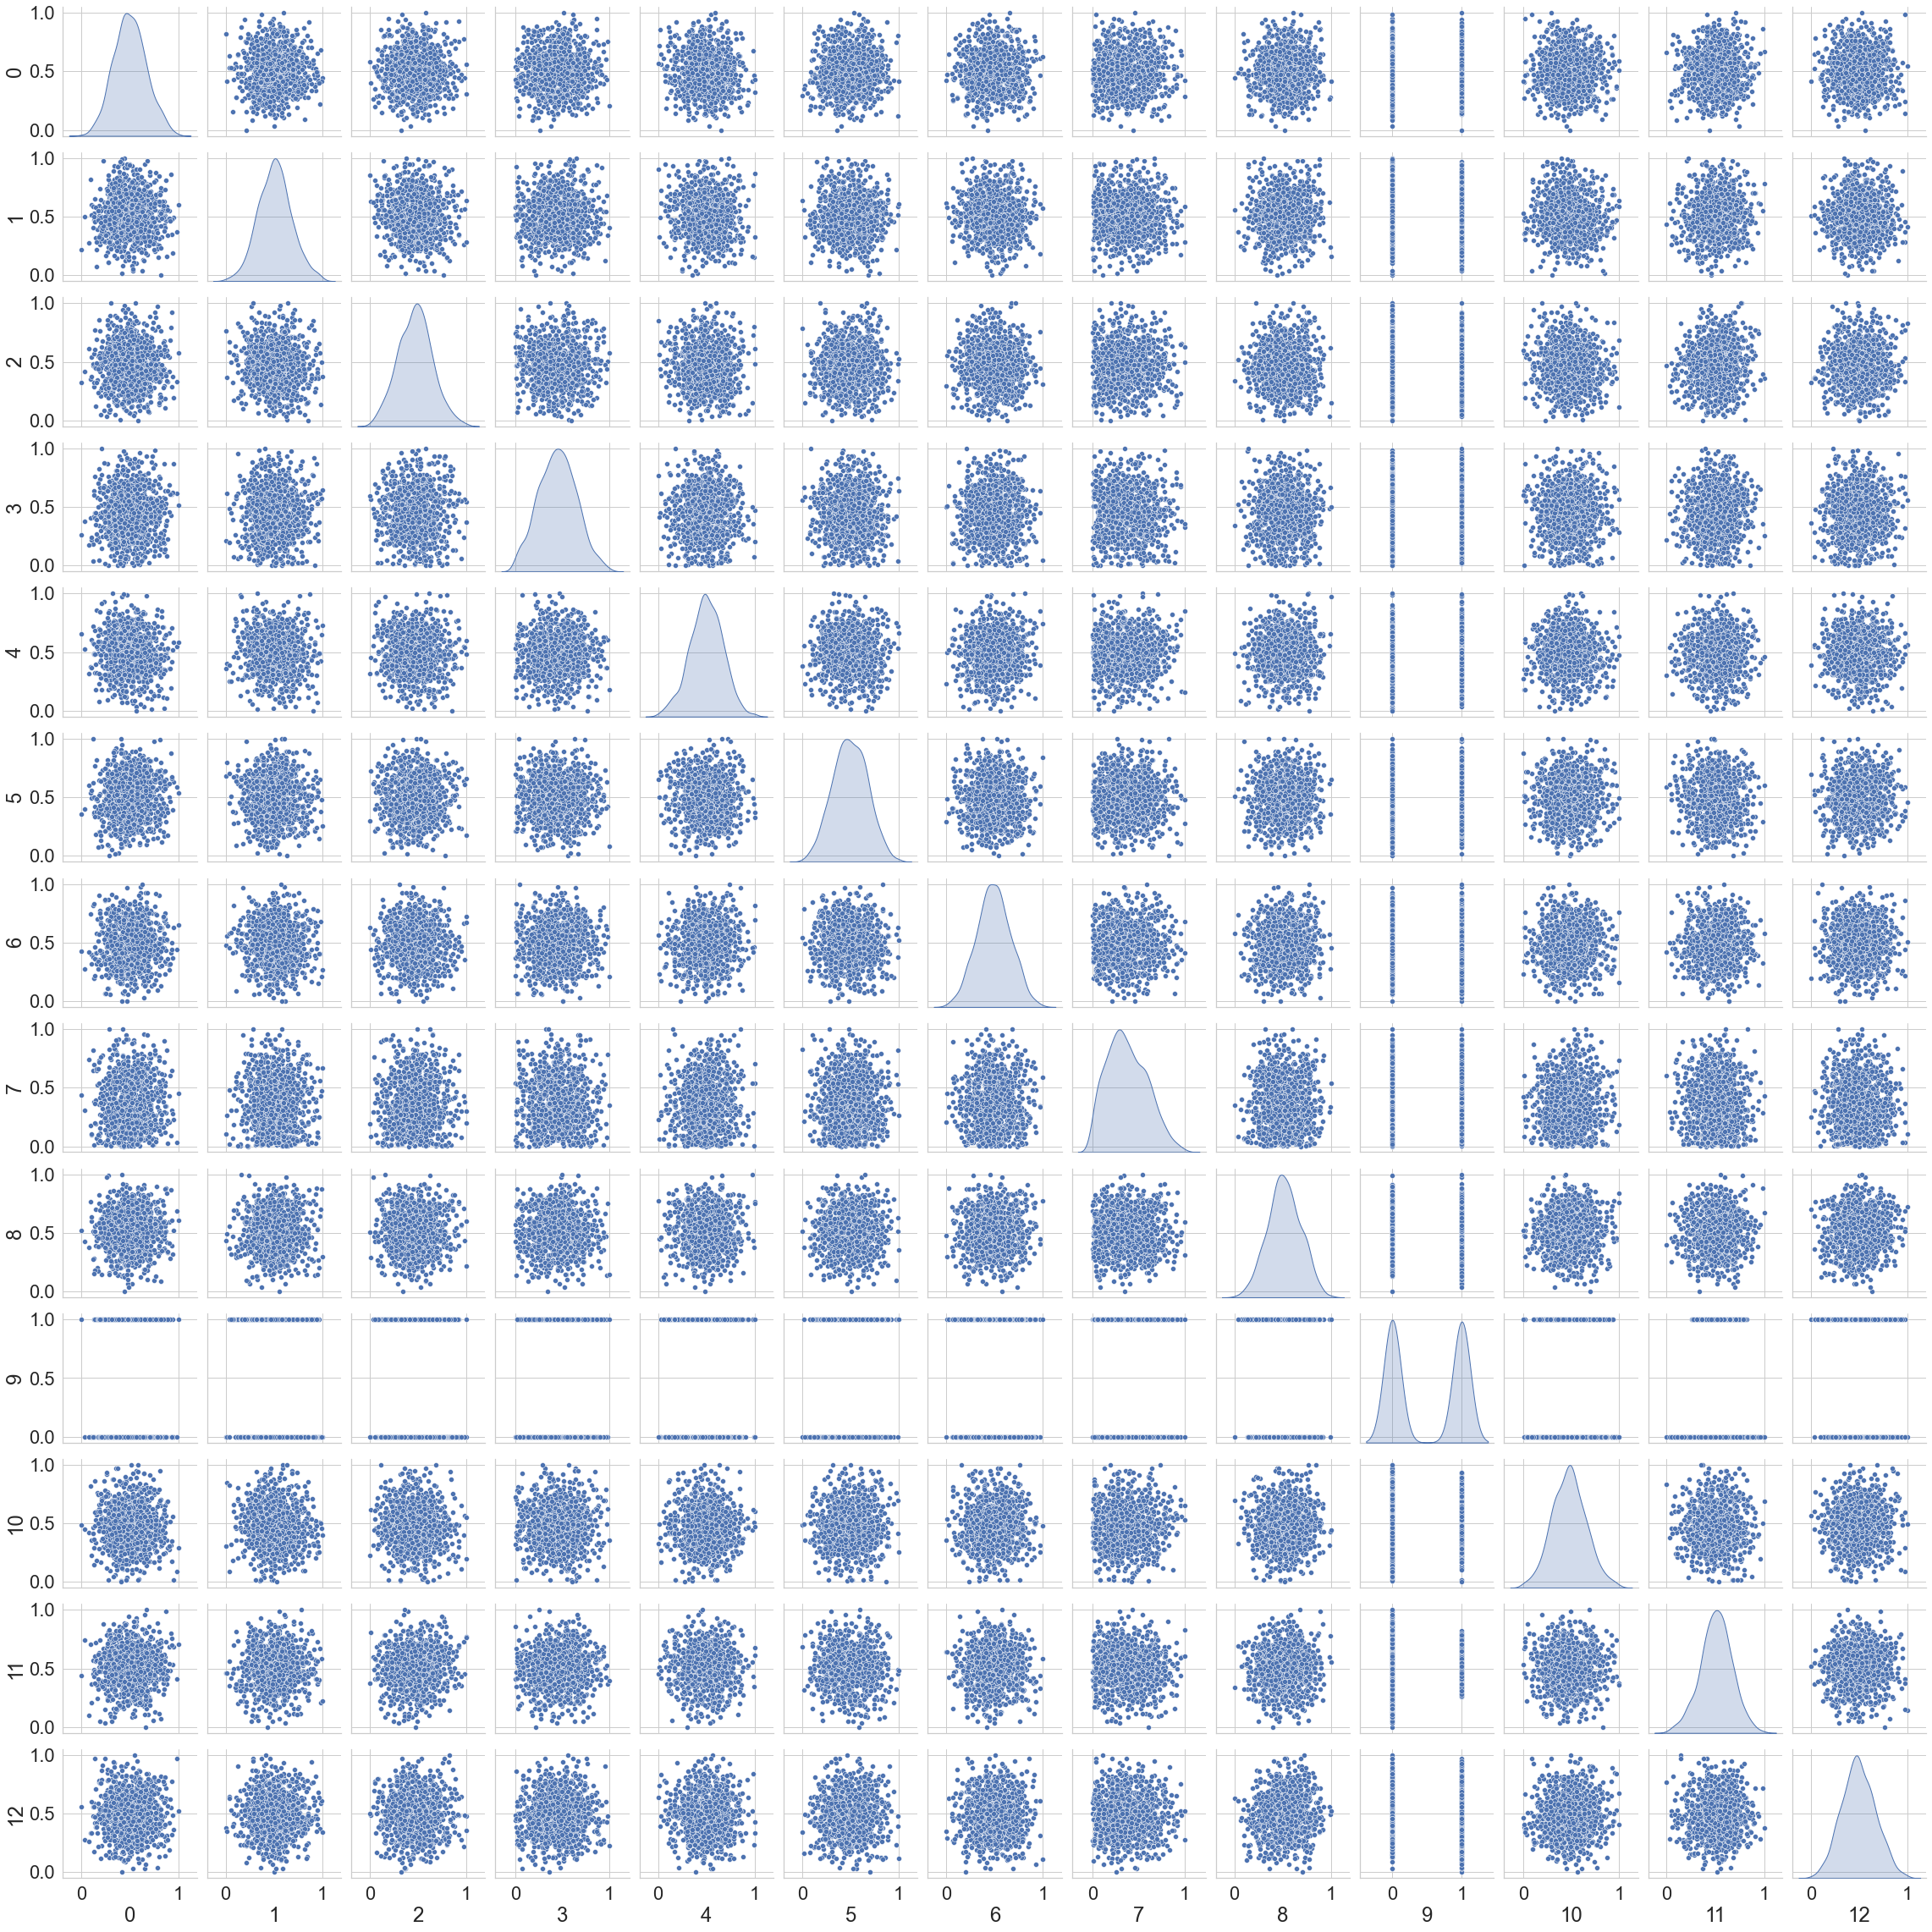

In [70]:
sns.pairplot(pd.DataFrame(np.column_stack([x, y])), diag_kind="kde")

Модель Сиквентал, ожидающая количество входов и выходов, добавляем полносвязный слой 32т нейронаб еще один слой 64 нейрона оптимизвтор адам, активация релу

In [93]:
model = Sequential(
[
    Dense(256, input_dim=12, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(1)
])


In [94]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [95]:
history = model.fit(xx_train, yy_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.0013
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.0013
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.0025
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.0025
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.0025
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.0013
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.0025
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.0000e+00
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.0013
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.0025
Epoch 11/30
25/

In [91]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)
    


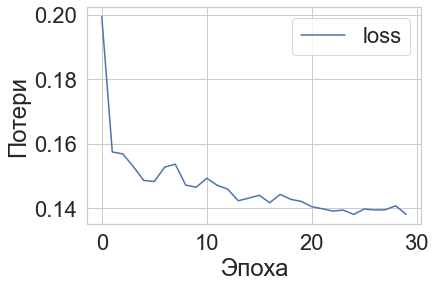

In [96]:
plot_loss(history)

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3328      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,353
Trainable params: 36,353
Non-trainable params: 0
_________________________________________________________________


In [98]:
prediction = model.predict(xx_test)

7/7 [==============================] - 0s 1ms/step


In [99]:
prediction

array([[0.3751628 ],
       [0.49184203],
       [0.43894303],
       [0.5564081 ],
       [0.41603497],
       [0.420911  ],
       [0.5774783 ],
       [0.43852443],
       [0.45014834],
       [0.41071844],
       [0.545811  ],
       [0.57436025],
       [0.44362736],
       [0.442948  ],
       [0.41896927],
       [0.3831079 ],
       [0.5060405 ],
       [0.4103313 ],
       [0.4732543 ],
       [0.53131455],
       [0.3909948 ],
       [0.47609586],
       [0.39006507],
       [0.4825564 ],
       [0.44555658],
       [0.4419373 ],
       [0.45815104],
       [0.41167057],
       [0.3987251 ],
       [0.47605467],
       [0.41424772],
       [0.4767434 ],
       [0.4753451 ],
       [0.54164064],
       [0.39278874],
       [0.41544235],
       [0.39691657],
       [0.4724834 ],
       [0.402084  ],
       [0.35445428],
       [0.42861038],
       [0.44151837],
       [0.41627055],
       [0.48930085],
       [0.3816599 ],
       [0.43198287],
       [0.43249333],
       [0.466

In [100]:
np.mean(np.abs((yy_test-prediction)), axis=0)

Соотношение матрица-наполнитель    0.1498
dtype: float64

In [101]:
np.abs(yy_test-prediction)

Соотношение матрица-наполнитель
524.0                         0.224416
626.0                         0.135115
468.0                         0.112804
380.0                         0.248983
249.0                         0.382387
...                                ...
444.0                         0.133104
605.0                         0.098369
567.0                         0.204815
625.0                         0.227182
214.0                         0.308171

[200 rows x 1 columns]

#### Сохрарнение модели

In [102]:
model.save('16_model')

INFO:tensorflow:Assets written to: 16_model\assets


Проверяем сохранилась ли модель

In [103]:
model_loaded = keras.models.load_model('12_model')

In [104]:
model.evaluate(xx_test, yy_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.0000e+00


[0.14979982376098633, 0.0]

Схранение модели в формате pkl

In [105]:
with open('model_pkl_16.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://4f5a269c-070f-45c3-a285-42df6789d18b/assets


to be continued... :)